<h1><center>Assignment No 1</center></h1>
<h1><center>Data Understanding and Exploratory Data Analysis</center></h1>


# Guidelines
1. Rename jupyter notebook as **rollnumber_firstname_lastname**.
1. You are only allowed to use pandas, numpy and seaborn libraries.
1. You are supposed to answer the question here on Jupyter notebook. Use markdown cells to answer the questions while use "Code" cells to write the code. You can double click on any markdown cell to edit it and press **shift+enter** to execute any cell.
1. Once finished, go to File menu and download the notebook as .html
1. Make sure all required figures and tables are visible in the HTML file.
1. Submit this HTML file. Note that it must follow the naming convention mentioned above.

# Import Libraries

In [1]:
# Do not modify this cell

import pandas as pd
import numpy as np
import seaborn as sns

# Import Data

In [2]:
# do not modify this cell

train_data = pd.read_csv('data/anneal.data', header=None,  
                         names = ['shape','thick','width','length','oil', 'bore', 'packing', 'classes'], 
                         sep= '\t')

In [3]:
train_data_backup = train_data
train_data.head(10)

,shape,thick,width,length,oil,bore,packing,classes
0,COIL,0.700,610.0,0,NaN,0,NaN,3
1,COIL,3.200,610.0,0,NaN,0,NaN,3
2,SHEET,0.700,1300.0,762,NaN,0,NaN,3
3,COIL,2.801,385.1,0,NaN,0,NaN,3
4,SHEET,0.801,255.0,269,NaN,0,NaN,3
5,COIL,1.600,610.0,0,NaN,0,NaN,3
6,SHEET,0.699,610.0,4880,Y,0,NaN,3
7,COIL,3.300,152.0,0,NaN,0,NaN,3
8,COIL,0.699,1320.0,0,NaN,0,NaN,3
9,SHEET,1.000,1320.0,762,NaN,0,NaN,3


# Part 1: Filling missing (NaN) values. (8 questions, 5 marks each)
**We have loaded a dataset for you and it's first 10 rows are printed. All below experiments are to be performed on the variable "train_data".**

1. Identify and enlist numerical and categorical attributes.
1. Print summary statistics of the numerical attributes of the data (mean, std, min, 25%, 50%, 75%, max, counts).
1. Write a code below that prints total number of records and total number of attributes of this data.
1. Fill the missing values with using next valid observation. For example, for **oil** column, first 6 rows would be filled with value **Y**. This is known as "backward fill". 
1. What problems would arise if you use "forward fill" instead?
1. Print summary statistics again and comment on the difference (before and after filling missing values).

**Enlist numerical and categorical attributes.**

> Numerical Attributes :
    thick
    width
    length
    bore
    packing
    
> Categorical Attributes:
    shape
    oil
    classes


    


In [4]:
# Print Summary statistics of numerical attribtues
train_data.describe()

,thick,width,length,bore,packing
count,798.000000,798.000000,798.000000,798.000000,9.000000
mean,1.181847,781.744361,1273.037594,28.195489,2.888889
std,0.861608,404.722346,1886.768139,124.811534,0.333333
min,0.250000,0.000000,0.000000,0.000000,2.000000
25%,0.601000,609.900000,0.000000,0.000000,3.000000
50%,0.800000,610.000000,611.000000,0.000000,3.000000
75%,1.600000,1250.000000,762.000000,0.000000,3.000000
max,4.000000,1525.000000,4880.000000,600.000000,3.000000


In [5]:
# Show number of records and number of attributes of the data above
print('Attibutes:', train_data.shape[1])
print('Rows:', train_data.shape[0])

Attibutes: 8
Rows: 798


In [6]:
# Write code to perform backward fill for all columns. Show first 10 rows.
train_data = train_data.fillna(method="bfill", axis=0)

In [7]:
print(train_data_backup.fillna(method="ffill", axis=0).isna().sum())
print(train_data.isna().sum())

shape       0
thick       0
width       0
length      0
oil         6
bore        0
packing    87
classes     0
dtype: int64
shape       0
thick       0
width       0
length      0
oil         4
bore        0
packing    29
classes     0
dtype: int64


# Convert this to a "Markdown" cell and answer the question 5.

As we can see from the data above that forward filling leaves more NaN values in this dataset compared to backfill so backfill is better.


In [8]:
# Print summary statistics after filling missing values

train_data.describe()

,thick,width,length,bore,packing
count,798.000000,798.000000,798.000000,798.000000,769.000000
mean,1.181847,781.744361,1273.037594,28.195489,2.892068
std,0.861608,404.722346,1886.768139,124.811534,0.310497
min,0.250000,0.000000,0.000000,0.000000,2.000000
25%,0.601000,609.900000,0.000000,0.000000,3.000000
50%,0.800000,610.000000,611.000000,0.000000,3.000000
75%,1.600000,1250.000000,762.000000,0.000000,3.000000
max,4.000000,1525.000000,4880.000000,600.000000,3.000000


7. Now use **train_data_backup** and fill missing values by taking mode of each column. Print summary statistics of numerical attributes and comment of the difference (between backward fill and mode fill).
8. Which method of filling missing values is desirable for this particular data and why?

In [9]:
# Fill missing values of train_data_backup and print summary statistics.

train_data_backup = train_data_backup.apply(lambda x: x.fillna(x.mode()[0]), axis=0)
train_data_backup.describe()

,thick,width,length,bore,packing
count,798.000000,798.000000,798.000000,798.000000,798.000000
mean,1.181847,781.744361,1273.037594,28.195489,2.998747
std,0.861608,404.722346,1886.768139,124.811534,0.035400
min,0.250000,0.000000,0.000000,0.000000,2.000000
25%,0.601000,609.900000,0.000000,0.000000,3.000000
50%,0.800000,610.000000,611.000000,0.000000,3.000000
75%,1.600000,1250.000000,762.000000,0.000000,3.000000
max,4.000000,1525.000000,4880.000000,600.000000,3.000000


# Comment on which method is better and why.

Filling with mode is better because less NaN values are left in some columns like the packing numerical column



# Part 2: Correlation, Covariance and Heatmaps (4 questions, 5 marks each)
**In this data, you are provided gender income data. Your job is to find correlation and covariance between attributes.**

In [10]:
gender_data = pd.read_csv("data/gender_data.csv", sep = ',')

In [11]:
gender_data.head()

,Gender,Age,Income,City
0,F,28,90000,khi
1,F,25,75000,lhr
2,F,22,50000,lhr
3,M,27,78000,lhr
4,M,22,50000,lhr


1. Identify "Binary Symmetric Attribute", "Numerical Continuous Attribute", "Numerical Discrete Attribute" and "Categorical Discrete Attribute".
1. Write a code to convert all categorical attributes to numerical attributes (you may use dictionary to map the values to integers).
1. Write code to calculate correlation matrix and visualize it using a heatmap. Note that if you have sucessfully converted all the attributes to numerical variables, you will get a 4x4 matrix. Comment on the results. In particularly, answer the following.
 1. Does the choice of city of employment makes an impact on the earning of a particular gender?
 1. Does income variable depends on age variable?
1. Write code to calculate covariance matrix and print it. Comment on the results. What does covariance signify with respect to this dataset?


**Write down the attributes you have identified.**




<ul>
<li>Binary Symmetric Attribute -> Gender</li>
<li>Numerical Continuous Attribute -> Income</li>
<li>Numerical Discrete Attribute -> Age</li>
<li>Categorical Discrete Attribute -> City</li>
</ul>

In [12]:
# Code to convert attributes
print('Before Conversion:', gender_data['Gender'].unique())
gender_data['Gender'] = gender_data['Gender'].apply(lambda x: 0 if x.strip() == 'F' else 1)
print('After Conversion:', gender_data['Gender'].unique())

print('Before Conversion:', gender_data['City'].unique())
ct = list(gender_data['City'].unique())
gender_data['City'] = gender_data['City'].apply(lambda x: ct.index(x))
print('After Conversion:', gender_data['City'].unique())

Before Conversion: ['F' 'M']
After Conversion: [0 1]
Before Conversion: ['khi' 'lhr' 'isb']
After Conversion: [0 1 2]


In [13]:
# Calculate correlation

correlation = gender_data.corr()

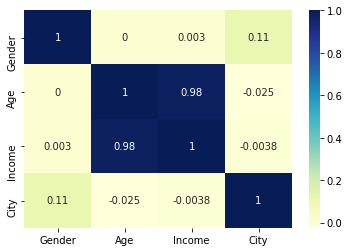

In [14]:
# Heatmap Sample
ax = sns.heatmap(correlation, annot=True, cmap="YlGnBu")

**Comments on the Heatmap above**




<h3>1. Does the choice of city of employment makes an impact on the earning of a particular gender?</h3>
<p>There is a weak negative corelation between City and Income which suggests there may or may not be any impact of one on the other but since we have converted this from a dict of fixed values we can't say anything for certain</p>
    
<h3>1. Does income variable depends on age variable?</h3>
<p>There is a really strong postive corelation between age and income which suggests that as they age increases income also increases in almost every case</p>

In [15]:
# Caclulate covariance matrix and print it (4x4 matrix)
covariance = gender_data.cov()
covariance

,Gender,Age,Income,City
Gender,0.255814,0.000000,2.325581e+01,0.046512
Age,0.000000,5.412262,3.460465e+04,-0.046512
Income,23.255814,34604.651163,2.313256e+08,-46.511628
City,0.046512,-0.046512,-4.651163e+01,0.651163


<h4>Comments on the Covariance</h4>

<p> There is high variance of income and gender which signifies that male and female income is varied significantly. There is also high variance between city and income. Negative sign doesn't matter in this case because I converted quanitative to numeric labels</p>

<p> Covariance matrix signifies the variation of one variable with respect to the other</p>



